In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import nescessary libraries

In [ ]:
# Import nescessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt

# Build model
import torch
import torch.nn as nn
import torch.nn.functional as F

# Training strategy
import torch.optim as optim
# Split data
from torch.utils.data import DataLoader
# Load data
import torchvision.datasets as datasets
# Data preprocessing
import torchvision.transforms as transforms

# Check 'CPU' or 'GPU'

In [ ]:
# Check whether we are using 'GPU' or 'CPU'
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Setup for getting the reproducible results

random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# USE MNIST DATASET
# setup hyperparameters
input_size = 784 #  1*28*28
n_classes = 10 # 10 digits 0,...,9
learning_rate = 0.001 # learning rate on gradient descent
batch_size = 64 # the number of samples in each batch
n_epochs = 5 # the number of training epochs

# Prepare MNIST dataset

In [ ]:
# LOAD data from Google Drive
# Load 'MNIST' dataset
train_dataset = datasets.MNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist' , train =True,
                              transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist' ,train=False,transform=transforms.ToTensor(),
                              download=True)
test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/10. Toán cho KHMT/As 5/dataset_mnist/MNIST/raw



5


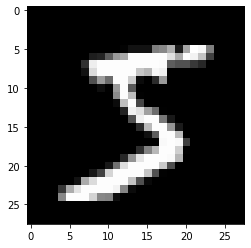

In [ ]:
# Show an image example in training set
image, label = train_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
print(label)

In [ ]:
# Build a Multi Layer Perceptron model by using Pytorch
# Problem dataset: MNIST
# Build a model has 4 layers include 1 'input' layer, 2 'hidden' layers, 1 'output' layer.
# 'input' layer has 782 nodes (input_size), 'hidden 1' layer has 100 nodes, 'hidden 2' layer has 100 nodes and 'output' layer has 25 nodes.
# The activation of each node in 'input' layer and 'hidden' layer is 'ReLU'
# The actiation of each node in 'output' layer is 'Softmax'
# 'out_features' value of 'output' layer is 10 (n_classes)

# Build MLP model

In [ ]:
#Build a MLP model by using Pytorch
#Approach 1
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 100)
    self.hidden_layer_1 = nn.Linear(100,100)
    self.hidden_layer_2 = nn.Linear(100,25)
    self.output_layer = nn.Linear(25,n_classes)

  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim=1)
    return prob 

In [ ]:
#Build a MLP model by using Pytorch
#Approach 2
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().___init__()
    self.model = nn.Sequential(
        nn.Linear(input_size, 100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,25),
        nn.ReLU(),
        nn.Linear(25,n_classes),
        nn.Softmax(dim=1)
    )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [ ]:
#Build a MLP model by using Pytorch
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (hidden_layer_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_2): Linear(in_features=100, out_features=25, bias=True)
  (output_layer): Linear(in_features=25, out_features=10, bias=True)
)


In [ ]:
#Define the loss and the optimization algorithm
criterion = nn.CrossEntropyLoss() # Loss function: Cross entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Optimizer: Adam

# Training model

In [ ]:
#Training model
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU
    data = data.to(device) # Put our images to the GPU if GPU is available
    targets = targets.to(device) # Put our labels to the GPU as well

    # Chage to the correct tensor shape
    # Our data is in the form (batch_size, color_channel, w,h) (64,1,28,28)
    # We need to change it to (batch_size, color_channel* w *h)(64, 784)
    data = data.reshape(data.shape[0],-1)

    # forward pass
    scores = model(data)
    loss = criterion(scores, targets) # Compute the loss/cost function 3 for this batch

    # backward pass
    optimizer.zero_grad() # empty the optimizer first
    loss.backward() # compute gradient dJ/dw's

    # Gradient descent
    optimizer.step()
    
    if (batch_idx+1)%100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/5, Batch 100, Loss: 1.83
Epoch 1/5, Batch 200, Loss: 1.72
Epoch 1/5, Batch 300, Loss: 1.73
Epoch 1/5, Batch 400, Loss: 1.70
Epoch 1/5, Batch 500, Loss: 1.58
Epoch 1/5, Batch 600, Loss: 1.71
Epoch 1/5, Batch 700, Loss: 1.61
Epoch 1/5, Batch 800, Loss: 1.68
Epoch 1/5, Batch 900, Loss: 1.64
Epoch 2/5, Batch 100, Loss: 1.57
Epoch 2/5, Batch 200, Loss: 1.58
Epoch 2/5, Batch 300, Loss: 1.70
Epoch 2/5, Batch 400, Loss: 1.52
Epoch 2/5, Batch 500, Loss: 1.57
Epoch 2/5, Batch 600, Loss: 1.56
Epoch 2/5, Batch 700, Loss: 1.57
Epoch 2/5, Batch 800, Loss: 1.66
Epoch 2/5, Batch 900, Loss: 1.49
Epoch 3/5, Batch 100, Loss: 1.48
Epoch 3/5, Batch 200, Loss: 1.51
Epoch 3/5, Batch 300, Loss: 1.53
Epoch 3/5, Batch 400, Loss: 1.50
Epoch 3/5, Batch 500, Loss: 1.54
Epoch 3/5, Batch 600, Loss: 1.49
Epoch 3/5, Batch 700, Loss: 1.50
Epoch 3/5, Batch 800, Loss: 1.51
Epoch 3/5, Batch 900, Loss: 1.52
Epoch 4/5, Batch 100, Loss: 1.47
Epoch 4/5, Batch 200, Loss: 1.49
Epoch 4/5, Batch 300, Loss: 1.52
Epoch 4/5,

# Performance Evaluation

In [ ]:
# Performance Evaluation
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval() # put our model to evaluation mode
  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)

      #forward
      scores = model(x) # scores 64 x 10
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)* 100.0:.2f}')
  model.train() # put our model to train mode again

In [ ]:
# Performance Evaluation
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 58094/60000 correct. Accuracy = 96.82
Getting accuracy on testing data.
We got 9620/10000 correct. Accuracy = 96.20
